In [6]:
import numpy as np
import matplotlib.pyplot as plt

SEIR model: For many important infections, there is a significant latency period during which individuals have been infected but are not yet infectious themselves. During this period the individual is in compartment E (for exposed). (Wikipedia)  
We add another ODE for E:  
> $\frac{dE}{dt} = \frac{\beta I S}{N} - (\mu + a)E$  

and a is defined as: the latency period is a random variable with exponential distribution with parameter 
a (i.e. the average latency period is $a^{-1}$) (Wikipedia)

# SEIR Euler

In [7]:
def seir_model(i0, N, nbday, beta, sigma, gamma, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]   # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]

    return S, E, I, R

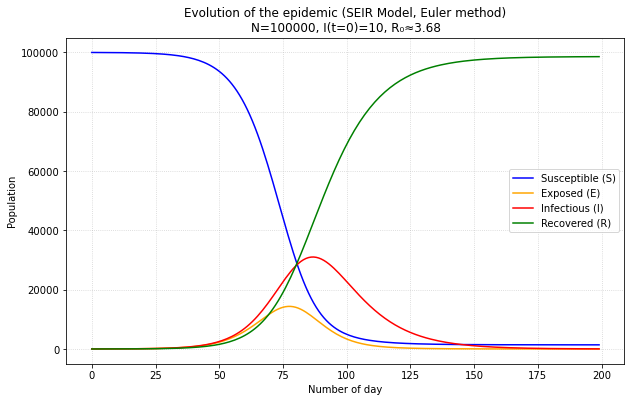

In [9]:
# 1. Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

# Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

# 2. Run the SEIRD simulation
S, E, I, R = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, Euler method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR RK2

In [12]:
def SEIRRK2(i0, N, nbjours, beta, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]   # Total must sum to N

    for i in range(nbjours - 1):

        # k1
        k1_S = (-beta * S[i] * I[i]) / N * dt
        k1_E = (beta * I[i] * S[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1
        S_k1 = S[i] + k1_S
        E_k1 = E[i] + k1_E
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R

        # k2
        k2_S = (-beta * S_k1 * I_k1) / N * dt
        k2_E = (beta * I_k1 * S_k1 / N - sigma * E_k1) * dt
        k2_I = (sigma * E_k1 - gamma * I_k1) * dt
        k2_R = (gamma * I_k1) * dt

        # U(n+1)
        S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
        E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
        I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

    return S, E, I, R

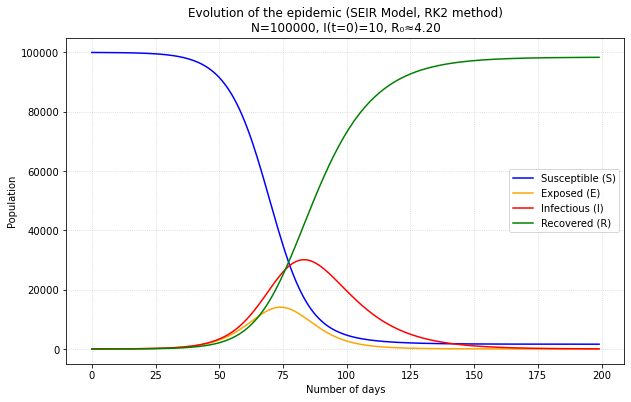

In [14]:
# 1. Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3
sigma = 1/5
gamma = 1/14

# 2. Run the SEIR simulation
S, E, I, R = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, RK2 method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/gamma:.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR RK4

In [15]:
def SEIRRK4(i0, N, nbjours, beta, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta * S[i] * I[i] / N) * dt
        k1_E = (beta * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1/2
        S1 = S[i] + 0.5 * k1_S
        E1 = E[i] + 0.5 * k1_E
        I1 = I[i] + 0.5 * k1_I
        R1 = R[i] + 0.5 * k1_R

        # --- k2 ---
        k2_S = (-beta * S1 * I1 / N) * dt
        k2_E = (beta * S1 * I1 / N - sigma * E1) * dt
        k2_I = (sigma * E1 - gamma * I1) * dt
        k2_R = (gamma * I1) * dt

        # U + k2/2
        S2 = S[i] + 0.5 * k2_S
        E2 = E[i] + 0.5 * k2_E
        I2 = I[i] + 0.5 * k2_I
        R2 = R[i] + 0.5 * k2_R

        # --- k3 ---
        k3_S = (-beta * S2 * I2 / N) * dt
        k3_E = (beta * S2 * I2 / N - sigma * E2) * dt
        k3_I = (sigma * E2 - gamma * I2) * dt
        k3_R = (gamma * I2) * dt

        # U + k3
        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R

        # --- k4 ---
        k4_S = (-beta * S3 * I3 / N) * dt
        k4_E = (beta * S3 * I3 / N - sigma * E3) * dt
        k4_I = (sigma * E3 - gamma * I3) * dt
        k4_R = (gamma * I3) * dt

        # --- Update (RK4 formula) ---
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, E, I, R

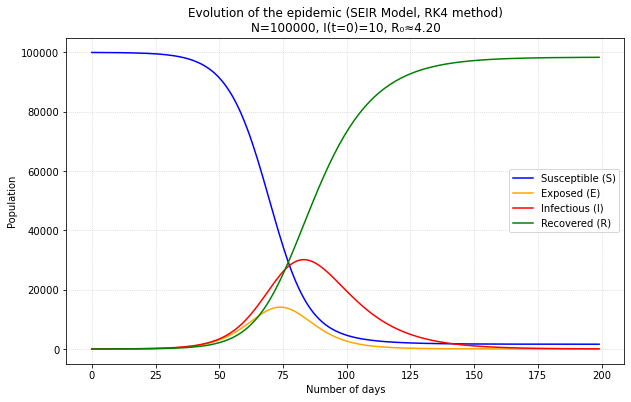

In [17]:
# 1. Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3
sigma = 1/5
gamma = 1/14

# 2. Run the SEIR simulation
S, E, I, R = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, RK4 method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/gamma:.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

SEIRDV model: we add deceased and vaccinated rates to the SEIR model. We use $\mu$ as our fatality rate (attached to D) and $\nu$ as our vaccination rate (attached to V).  
New ODEs added are simply:  
>$\frac{dV}{dt} = \nu S$  
$\frac{dD}{dt} = \mu I$

# SEIRDV Euler

In [18]:
def seirdv_model(i0, N, nbday, beta, sigma, gamma, mu, nu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)
    V = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] - V[0]

    # Propagation
    for i in range(nbday - 1):

        # Force of infection
        infection = beta * I[i] * S[i] / N

        # Updates
        S[i+1] = S[i] - infection - nu * S[i]
        E[i+1] = E[i] + infection - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]
        V[i+1] = V[i] + nu * S[i]

    return S, E, I, R, D, V

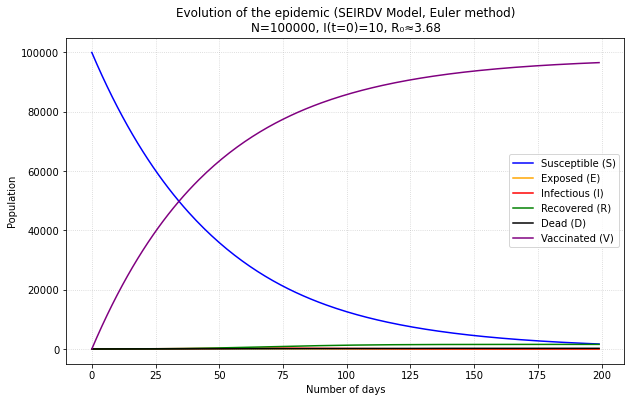

In [19]:
# 1. Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3        # Transmission rate
sigma = 1/5       # Incubation rate
gamma = 1/14      # Recovery rate
mu = 0.01         # Mortality rate
nu = 0.02         # Vaccination rate

# 2. Run the SEIRDV simulation
S, E, I, R, D, V = seirdv_model(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.plot(V, label="Vaccinated (V)", color='purple')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRDV Model, Euler method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRDV RK2

In [20]:
def SEIRDV_RK2(i0, N, nbjours, beta, sigma, gamma, mu, nu, e0=0):

    dt = 1
    # Lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)
    D = np.zeros(nbjours)
    V = np.zeros(nbjours)

    # Initial conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta*S[i]*I[i]/N - nu*S[i]) * dt
        k1_E = (beta*S[i]*I[i]/N - sigma*E[i]) * dt
        k1_I = (sigma*E[i] - gamma*I[i] - mu*I[i]) * dt
        k1_R = (gamma*I[i]) * dt
        k1_D = (mu*I[i]) * dt
        k1_V = (nu*S[i]) * dt

        # U + k1
        S1 = S[i] + k1_S
        E1 = E[i] + k1_E
        I1 = I[i] + k1_I
        R1 = R[i] + k1_R
        D1 = D[i] + k1_D
        V1 = V[i] + k1_V

        # --- k2 ---
        k2_S = (-beta*S1*I1/N - nu*S1) * dt
        k2_E = (beta*S1*I1/N - sigma*E1) * dt
        k2_I = (sigma*E1 - gamma*I1 - mu*I1) * dt
        k2_R = (gamma*I1) * dt
        k2_D = (mu*I1) * dt
        k2_V = (nu*S1) * dt

        # Combine (RK2 = midpoint)
        S[i+1] = S[i] + 0.5*(k1_S + k2_S)
        E[i+1] = E[i] + 0.5*(k1_E + k2_E)
        I[i+1] = I[i] + 0.5*(k1_I + k2_I)
        R[i+1] = R[i] + 0.5*(k1_R + k2_R)
        D[i+1] = D[i] + 0.5*(k1_D + k2_D)
        V[i+1] = V[i] + 0.5*(k1_V + k2_V)

    return S, E, I, R, D, V

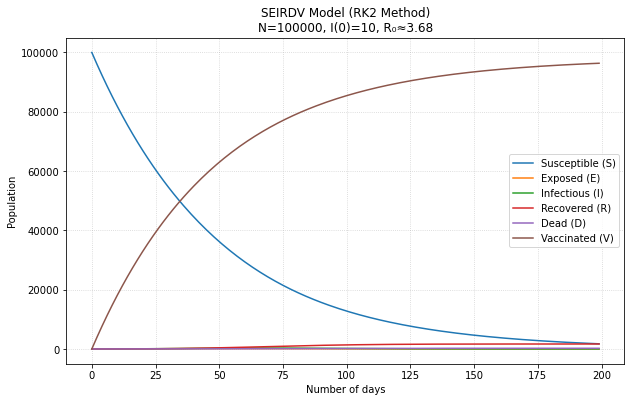

In [22]:
# 1. Define Parameters and Initial Conditions
N_total = 100000
i_initial = 10
e_initial = 10
days = 200

# Model parameters
beta = 0.3
sigma = 1/5
gamma = 1/14
mu = 0.01
nu = 0.02

# 2. Run the SEIRDV RK2 simulation
S, E, I, R, D, V = SEIRDV_RK2(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)")
plt.plot(E, label="Exposed (E)")
plt.plot(I, label="Infectious (I)")
plt.plot(R, label="Recovered (R)")
plt.plot(D, label="Dead (D)")
plt.plot(V, label="Vaccinated (V)")

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"SEIRDV Model (RK2 Method)\nN={N_total}, I(0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRDV RK4

In [21]:
def SEIRDV_RK4(i0, N, nbjours, beta, sigma, gamma, mu, nu, e0=0):

    dt = 1
    # Lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)
    D = np.zeros(nbjours)
    V = np.zeros(nbjours)

    # Initial conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta*S[i]*I[i]/N - nu*S[i]) * dt
        k1_E = (beta*S[i]*I[i]/N - sigma*E[i]) * dt
        k1_I = (sigma*E[i] - gamma*I[i] - mu*I[i]) * dt
        k1_R = (gamma*I[i]) * dt
        k1_D = (mu*I[i]) * dt
        k1_V = (nu*S[i]) * dt

        # U + k1/2
        S1 = S[i] + 0.5*k1_S
        E1 = E[i] + 0.5*k1_E
        I1 = I[i] + 0.5*k1_I
        R1 = R[i] + 0.5*k1_R
        D1 = D[i] + 0.5*k1_D
        V1 = V[i] + 0.5*k1_V

        # --- k2 ---
        k2_S = (-beta*S1*I1/N - nu*S1) * dt
        k2_E = (beta*S1*I1/N - sigma*E1) * dt
        k2_I = (sigma*E1 - gamma*I1 - mu*I1) * dt
        k2_R = (gamma*I1) * dt
        k2_D = (mu*I1) * dt
        k2_V = (nu*S1) * dt

        # U + k2/2
        S2 = S[i] + 0.5*k2_S
        E2 = E[i] + 0.5*k2_E
        I2 = I[i] + 0.5*k2_I
        R2 = R[i] + 0.5*k2_R
        D2 = D[i] + 0.5*k2_D
        V2 = V[i] + 0.5*k2_V

        # --- k3 ---
        k3_S = (-beta*S2*I2/N - nu*S2) * dt
        k3_E = (beta*S2*I2/N - sigma*E2) * dt
        k3_I = (sigma*E2 - gamma*I2 - mu*I2) * dt
        k3_R = (gamma*I2) * dt
        k3_D = (mu*I2) * dt
        k3_V = (nu*S2) * dt

        # U + k3
        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R
        D3 = D[i] + k3_D
        V3 = V[i] + k3_V

        # --- k4 ---
        k4_S = (-beta*S3*I3/N - nu*S3) * dt
        k4_E = (beta*S3*I3/N - sigma*E3) * dt
        k4_I = (sigma*E3 - gamma*I3 - mu*I3) * dt
        k4_R = (gamma*I3) * dt
        k4_D = (mu*I3) * dt
        k4_V = (nu*S3) * dt

        # Combine (RK4)
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E)/6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R)/6
        D[i+1] = D[i] + (k1_D + 2*k2_D + 2*k3_D + k4_D)/6
        V[i+1] = V[i] + (k1_V + 2*k2_V + 2*k3_V + k4_V)/6

    return S, E, I, R, D, V

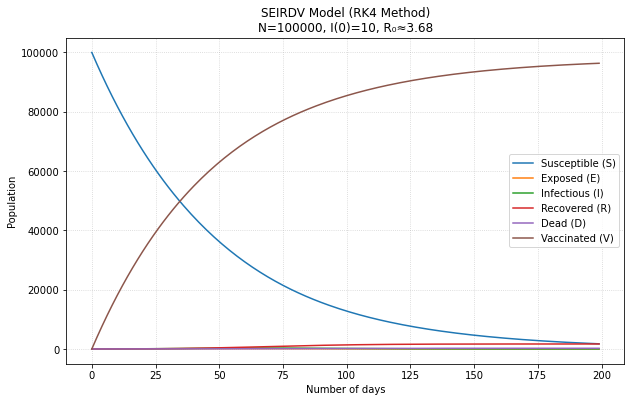

In [23]:
# 1. Define Parameters and Initial Conditions
N_total = 100000
i_initial = 10
e_initial = 10
days = 200

# Model parameters
beta = 0.3
sigma = 1/5
gamma = 1/14
mu = 0.01
nu = 0.02

# 2. Run the SEIRDV RK4 simulation
S, E, I, R, D, V = SEIRDV_RK4(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

# 3. Plot the results
plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)")
plt.plot(E, label="Exposed (E)")
plt.plot(I, label="Infectious (I)")
plt.plot(R, label="Recovered (R)")
plt.plot(D, label="Dead (D)")
plt.plot(V, label="Vaccinated (V)")

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"SEIRDV Model (RK4 Method)\nN={N_total}, I(0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()